# Preprocesamiento Datos

Librerias


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
from keras import optimizers
import numpy as np
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import lite



<p> El dataset de acciones.xls es obtenido mediante el siguiente link: https://www.bolsadequito.com/uploads/estadisticas/boletines/cotizaciones-historicas/acciones.xls</p>

In [2]:
df2021 = pd.read_excel('acciones.xls', skiprows=range(1,8), usecols="B:I", header=1, sheet_name='2021', skipfooter=6)
df2022 = pd.read_excel('acciones.xls', skiprows=range(1,8), usecols="B:I", header=1, sheet_name='2022', skipfooter=6)
stockDf = pd.concat([df2021, df2022])
stockDf['FECHA'] = pd.to_datetime(stockDf['FECHA'])
stockDf.head()

,FECHA,EMISOR,VALOR,VALOR NOMINAL,PRECIO,NUMERO ACCIONES,VALOR EFECTIVO,PROCEDENCIA
0,2021-01-04,HOMEFOREST EL REFUGIO FORESTAL S A,ACCIONES,1,25.68,550,14124.00,G
1,2021-01-04,CERRO VERDE FORESTAL S A BIGFOREST,ACCIONES,1,31.91,1100,35101.00,G
2,2021-01-04,CORPORACION FAVORITA C.A.,ACCIONES,1,2.41,1999,4817.59,Q
3,2021-01-04,CORPORACION FAVORITA C.A.,ACCIONES,1,2.40,4081,9794.40,G
4,2021-01-04,EL TECAL,ACCIONES,1,35.00,550,19250.00,G


In [3]:
company_list = ["CORPORACION FAVORITA C.A.", "BANCO GUAYAQUIL S.A.", "CERVECERIA NACIONAL CN S A"]
stockDf = stockDf[stockDf.EMISOR.isin(company_list)]
stockDf

,FECHA,EMISOR,VALOR,VALOR NOMINAL,PRECIO,NUMERO ACCIONES,VALOR EFECTIVO,PROCEDENCIA
2,2021-01-04,CORPORACION FAVORITA C.A.,ACCIONES,1,2.41,1999,4817.59,Q
3,2021-01-04,CORPORACION FAVORITA C.A.,ACCIONES,1,2.40,4081,9794.40,G
5,2021-01-05,BANCO GUAYAQUIL S.A.,ACCIONES,1,1.00,602,602.00,Q
7,2021-01-05,CORPORACION FAVORITA C.A.,ACCIONES,1,2.41,454,1094.14,G
8,2021-01-05,CORPORACION FAVORITA C.A.,ACCIONES,1,2.40,1938,4651.20,G
...,...,...,...,...,...,...,...,...
7438,2022-12-09,CORPORACION FAVORITA C.A.,ACCIONES,1,2.14,175,374.50,Q
7440,2022-12-09,CORPORACION FAVORITA C.A.,ACCIONES,1,2.14,234,500.76,Q
7442,2022-12-09,CORPORACION FAVORITA C.A.,ACCIONES,1,1.94,25711,49879.34,Q
7444,2022-12-09,CORPORACION FAVORITA C.A.,ACCIONES,1,2.14,9687,20730.18,G


## Generacion de Datasets

Corporacion Favorita

In [4]:
stockValue_CorpFavorita = stockDf.copy()
stockValue_CorpFavorita = stockValue_CorpFavorita[stockValue_CorpFavorita.EMISOR=="CORPORACION FAVORITA C.A."]
stockValue_CorpFavorita = stockValue_CorpFavorita.drop('VALOR', axis=1)
stockValue_CorpFavorita = stockValue_CorpFavorita.drop('PROCEDENCIA', axis=1)
stockValue_CorpFavorita = stockValue_CorpFavorita.drop('NUMERO ACCIONES', axis=1)
stockValue_CorpFavorita = stockValue_CorpFavorita.drop('VALOR NOMINAL', axis=1)
stockValue_CorpFavorita = stockValue_CorpFavorita.drop('VALOR EFECTIVO', axis=1)
stockValue_CorpFavorita

,FECHA,EMISOR,PRECIO
2,2021-01-04,CORPORACION FAVORITA C.A.,2.41
3,2021-01-04,CORPORACION FAVORITA C.A.,2.40
7,2021-01-05,CORPORACION FAVORITA C.A.,2.41
8,2021-01-05,CORPORACION FAVORITA C.A.,2.40
9,2021-01-05,CORPORACION FAVORITA C.A.,2.40
...,...,...,...
7438,2022-12-09,CORPORACION FAVORITA C.A.,2.14
7440,2022-12-09,CORPORACION FAVORITA C.A.,2.14
7442,2022-12-09,CORPORACION FAVORITA C.A.,1.94
7444,2022-12-09,CORPORACION FAVORITA C.A.,2.14


Plot para validar representacion en Android

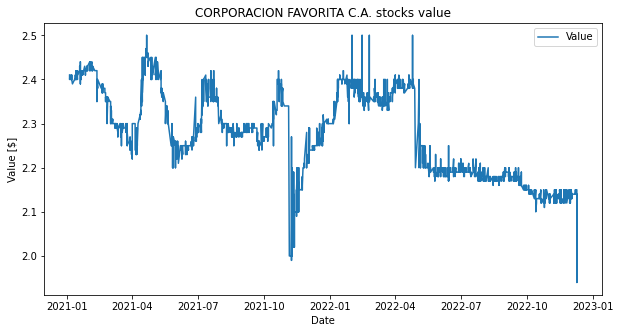

In [5]:
stock = stockValue_CorpFavorita
plt.figure(figsize=(10,5))
plt.plot(stock['FECHA'], stock['PRECIO'], label='Value')
plt.xlabel('Date')
plt.ylabel('Value [$]')
plt.title('CORPORACION FAVORITA C.A. stocks value')
plt.legend()

Banco Guayaquil

In [6]:
stockValue_bncGuayaquil = stockDf.copy()
stockValue_bncGuayaquil = stockValue_bncGuayaquil[stockValue_bncGuayaquil.EMISOR=="BANCO GUAYAQUIL S.A."]
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop('VALOR', axis=1)
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop('PROCEDENCIA', axis=1)
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop('NUMERO ACCIONES', axis=1)
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop('VALOR NOMINAL', axis=1)
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop('VALOR EFECTIVO', axis=1)
stockValue_bncGuayaquil = stockValue_bncGuayaquil.reset_index(drop=True)
stockValue_bncGuayaquil

,FECHA,EMISOR,PRECIO
0,2021-01-05,BANCO GUAYAQUIL S.A.,1.00
1,2021-01-06,BANCO GUAYAQUIL S.A.,0.88
2,2021-01-07,BANCO GUAYAQUIL S.A.,0.89
3,2021-01-07,BANCO GUAYAQUIL S.A.,0.87
4,2021-01-11,BANCO GUAYAQUIL S.A.,0.88
...,...,...,...
846,2022-12-09,BANCO GUAYAQUIL S.A.,1.00
847,2022-12-09,BANCO GUAYAQUIL S.A.,1.00
848,2022-12-09,BANCO GUAYAQUIL S.A.,1.00
849,2022-12-09,BANCO GUAYAQUIL S.A.,1.00


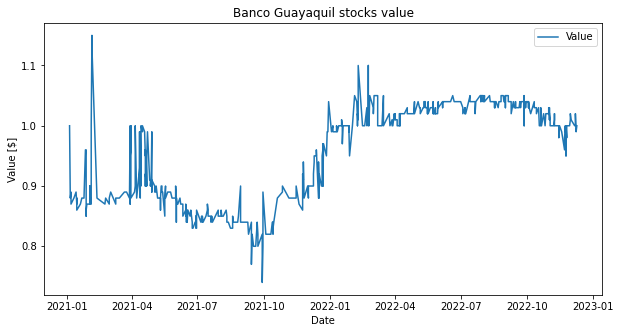

In [7]:
stock = stockValue_bncGuayaquil
plt.figure(figsize=(10,5))
plt.plot(stock['FECHA'], stock['PRECIO'], label='Value')
plt.xlabel('Date')
plt.ylabel('Value [$]')
plt.title('Banco Guayaquil stocks value')
plt.legend()

Cerveceria Nacional

In [8]:
stockValue_cervNacional= stockDf.copy()
stockValue_cervNacional= stockValue_cervNacional[stockValue_cervNacional.EMISOR=="CERVECERIA NACIONAL CN S A"]
stockValue_cervNacional= stockValue_cervNacional.drop('VALOR', axis=1)
stockValue_cervNacional= stockValue_cervNacional.drop('PROCEDENCIA', axis=1)
stockValue_cervNacional= stockValue_cervNacional.drop('NUMERO ACCIONES', axis=1)
stockValue_cervNacional= stockValue_cervNacional.drop('VALOR EFECTIVO', axis=1)
stockValue_cervNacional= stockValue_cervNacional.drop('VALOR NOMINAL', axis=1)
stockValue_cervNacional = stockValue_cervNacional.reset_index(drop=True)
stockValue_cervNacional

,FECHA,EMISOR,PRECIO
0,2021-01-05,CERVECERIA NACIONAL CN S A,84.0
1,2021-01-06,CERVECERIA NACIONAL CN S A,83.8
2,2021-01-07,CERVECERIA NACIONAL CN S A,84.0
3,2021-01-08,CERVECERIA NACIONAL CN S A,85.0
4,2021-01-11,CERVECERIA NACIONAL CN S A,85.0
...,...,...,...
387,2022-12-02,CERVECERIA NACIONAL CN S A,55.0
388,2022-12-02,CERVECERIA NACIONAL CN S A,55.0
389,2022-12-02,CERVECERIA NACIONAL CN S A,55.0
390,2022-12-07,CERVECERIA NACIONAL CN S A,55.0


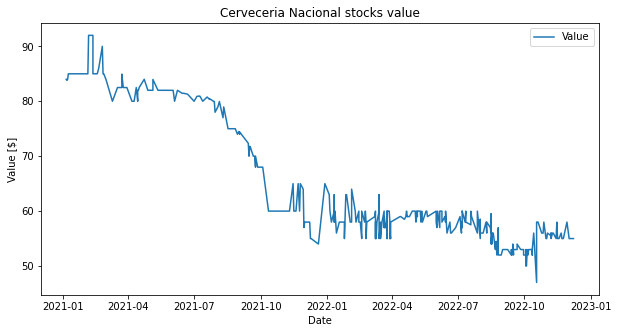

In [9]:
stock = stockValue_cervNacional
plt.figure(figsize=(10,5))
plt.plot(stock['FECHA'], stock['PRECIO'], label='Value')
plt.xlabel('Date')
plt.ylabel('Value [$]')
plt.title('Cerveceria Nacional stocks value')
plt.legend()

# Red Neuronal

In [10]:
'''Funcion para preparar el dataset para validacion multistep'''
'''Esta funcion se desarrollo en base a la fucnion desarrollada por Jason Brownlee [1]'''
def to_supervised(train, n_input, n_out=30):
    data = train
    X, y = list(), list()
    in_start = 0
    for _ in range(len(data)):
        in_end = in_start + n_input
        out_end = in_end + n_out
        if out_end < len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        in_start += 1
    return np.array(X), np.array(y)


Corporacion Favorita

In [11]:
puntos_prediccion = 60
datos_futuro = 30
'''Normalizamos los Datos'''
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_CorpFavorita['PRECIO'].values.reshape(-1,1))
X_datos, Y_datos = to_supervised(datos_norm, 60,30)
print(X_datos.shape)
print(Y_datos.shape)

(3988, 60, 1)
(3988, 30)


Modelo

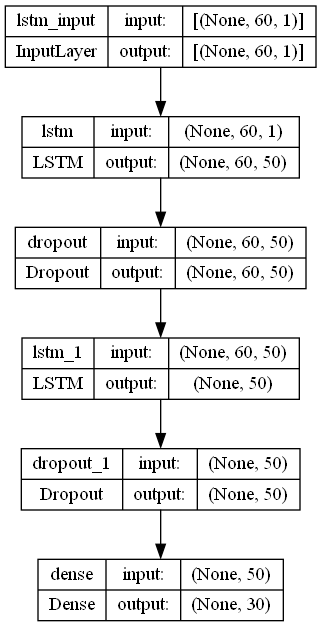

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(puntos_prediccion,1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=30))

model.compile(optimizer='adam', loss='mean_squared_error')
plot_model(model, to_file='model.png', show_shapes=True)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_datos, Y_datos, test_size=0.2, random_state=0)

In [15]:
history = model.fit(X_train,y_train,epochs=500,batch_size=32, validation_split=0.1)

Epoch 1/500
90/90 [==============================] - 7s 41ms/step - loss: 0.0893 - val_loss: 0.0038
Epoch 2/500
90/90 [==============================] - 3s 34ms/step - loss: 0.0221 - val_loss: 0.0074
Epoch 3/500
90/90 [==============================] - 3s 38ms/step - loss: 0.0160 - val_loss: 0.0042
Epoch 4/500
90/90 [==============================] - 3s 38ms/step - loss: 0.0133 - val_loss: 0.0036
Epoch 5/500
90/90 [==============================] - 3s 36ms/step - loss: 0.0114 - val_loss: 0.0033
Epoch 6/500
90/90 [==============================] - 5s 53ms/step - loss: 0.0098 - val_loss: 0.0027
Epoch 7/500
90/90 [==============================] - 3s 36ms/step - loss: 0.0093 - val_loss: 0.0044
Epoch 8/500
90/90 [==============================] - 3s 38ms/step - loss: 0.0085 - val_loss: 0.0026
Epoch 9/500
90/90 [==============================] - 4s 39ms/step - loss: 0.0079 - val_loss: 0.0034
Epoch 10/500
90/90 [==============================] - 3s 35ms/step - loss: 0.0076 - val_loss: 0.0026

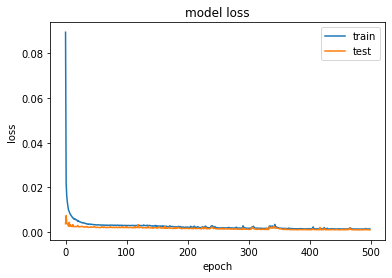

In [16]:
histories = []
histories.append(history)
history_dict = histories[0].history
plt.figure()
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predict_prices = model.predict(X_test)
predict_prices
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,predict_prices )}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,predict_prices )}")
print(f"R square: {r2_score(y_test,predict_prices )}")

25/25 [==============================] - 1s 13ms/step
#####Metrics#####
Mean Squared Error: 0.0012668425882429823
Mean Absolute Error: 0.021088732303661435
R square: 0.9561469047065325


Convertimos modelo a tflite

In [18]:
'''Estructura del convertidor basado en el notebook ejemplo de Tensorflowlite [2]'''
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmphm5lkg94\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmphm5lkg94\assets


In [19]:
#Ver shape del input y output del modelo
interpreter = tf.lite.Interpreter(model_content=tfmodel)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

[{'name': 'serving_default_lstm_input:0', 'index': 0, 'shape': array([ 1, 60,  1]), 'shape_signature': array([-1, 60,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 45, 'shape': array([ 1, 30]), 'shape_signature': array([-1, 30]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [20]:
#Verificamos que los outputs del modelo lite sean los mismos del modelo Keras
X_test = np.array(X_test, dtype=np.float32)
for i in range(len(X_test)):
  expected = model.predict(X_test[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  np.testing.assert_almost_equal(expected, result, decimal=5)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")
  interpreter.reset_all_variables()

1/1 [==============================] - 0s 25ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 26ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 24ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 30ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 24ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 30ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [===================

In [21]:
'''Metricas TFLite'''
result = []
for i in range(len(X_test)):
    interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
    interpreter.invoke()
    result.append(interpreter.get_tensor(output_details[0]["index"]))
    interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,result)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,result)}")
print(f"R square: {r2_score(y_test,result)}")

#####Metrics#####
Mean Squared Error: 0.0012668425632770034
Mean Absolute Error: 0.021088732068379946
R square: 0.9561469055599164


In [22]:
stockValue_CorpFavorita = stockValue_CorpFavorita.drop_duplicates(subset = "FECHA")
stockValue_CorpFavorita = stockValue_CorpFavorita.loc[stockValue_CorpFavorita['FECHA'] >= '2021-12-12']
stockValue_CorpFavorita

,FECHA,EMISOR,PRECIO
6435,2021-12-13,CORPORACION FAVORITA C.A.,2.25
6520,2021-12-14,CORPORACION FAVORITA C.A.,2.25
6531,2021-12-15,CORPORACION FAVORITA C.A.,2.26
6645,2021-12-16,CORPORACION FAVORITA C.A.,2.25
6652,2021-12-17,CORPORACION FAVORITA C.A.,2.25
...,...,...,...
7258,2022-12-05,CORPORACION FAVORITA C.A.,2.14
7261,2022-12-06,CORPORACION FAVORITA C.A.,2.14
7324,2022-12-07,CORPORACION FAVORITA C.A.,2.14
7377,2022-12-08,CORPORACION FAVORITA C.A.,2.15


In [23]:
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_CorpFavorita['PRECIO'].values.reshape(-1,1))
X_datos = []
Y_datos = []
X_datos.append(datos_norm[-60:,0])
Y_datos.append(datos_norm[-60:,0])
X_datos, Y_datos= np.array(X_datos), np.array(Y_datos)
X_datos = np.reshape(X_datos, (X_datos.shape[0], X_datos.shape[1],1))

In [24]:
# keras
prediccion = model.predict(X_datos)
predicted_prices_scaled = normalizador.inverse_transform(prediccion)
predicted_prices_scaled

1/1 [==============================] - 0s 23ms/step


array([[2.1867003, 2.1868515, 2.1911705, 2.194847 , 2.1956053, 2.19892  ,
        2.2032702, 2.2057955, 2.210545 , 2.2132144, 2.2162294, 2.217293 ,
        2.2201762, 2.2245073, 2.2258413, 2.2285495, 2.231891 , 2.23048  ,
        2.2268429, 2.2278507, 2.228773 , 2.231058 , 2.2282047, 2.2236233,
        2.2223523, 2.2216654, 2.2239723, 2.220586 , 2.218533 , 2.2159925]],
      dtype=float32)

In [25]:
# Lite
result = []
X_datos = X_datos.astype(np.float32)
interpreter.set_tensor(input_details[0]["index"], X_datos)
interpreter.invoke()
result.append(interpreter.get_tensor(output_details[0]["index"]))
interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
print(result)
predicted_prices_scaled = normalizador.inverse_transform(result)
predicted_prices_scaled

[[0.23000097 0.23052278 0.24541494 0.25809318 0.2607075  0.27213776
  0.28713828 0.2958469  0.31222433 0.321429   0.3318254  0.33549362
  0.3454349  0.3603707  0.36497003 0.3743086  0.38583064 0.3809652
  0.36842358 0.37189883 0.37508    0.38295832 0.37311965 0.3573218
  0.3529389  0.35057062 0.3585254  0.34684902 0.33976907 0.33100837]]


array([[2.1867003, 2.1868517, 2.1911705, 2.194847 , 2.1956053, 2.19892  ,
        2.2032702, 2.2057955, 2.210545 , 2.2132144, 2.2162294, 2.217293 ,
        2.2201762, 2.2245073, 2.2258413, 2.2285495, 2.231891 , 2.23048  ,
        2.2268429, 2.2278507, 2.228773 , 2.231058 , 2.2282047, 2.2236233,
        2.2223523, 2.2216654, 2.2239723, 2.220586 , 2.218533 , 2.2159925]],
      dtype=float32)

In [26]:
keras_file = "modelCF.h5"
model.save(keras_file, save_format="tf")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()
open("modelCF.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpihj5_wp4\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpihj5_wp4\assets


160008

In [27]:
del model, datos_norm, keras_file, converter,result, X_train, X_test, y_train, y_test, X_datos, Y_datos, predict_prices

Banco Guayaquil

In [28]:
'''Normalizamos los Datos'''
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_bncGuayaquil['PRECIO'].values.reshape(-1,1))
datos_norm

array([[0.63414634],
       [0.34146341],
       [0.36585366],
       [0.31707317],
       [0.34146341],
       [0.34146341],
       [0.36585366],
       [0.31707317],
       [0.34146341],
       [0.31707317],
       [0.29268293],
       [0.31707317],
       [0.34146341],
       [0.34146341],
       [0.34146341],
       [0.34146341],
       [0.53658537],
       [0.53658537],
       [0.53658537],
       [0.26829268],
       [0.29268293],
       [0.31707317],
       [0.29268293],
       [0.34146341],
       [0.29268293],
       [0.31707317],
       [0.31707317],
       [0.34146341],
       [0.34146341],
       [0.3902439 ],
       [0.36585366],
       [0.31707317],
       [0.34146341],
       [0.31707317],
       [0.34146341],
       [0.34146341],
       [0.34146341],
       [0.63414634],
       [0.63414634],
       [0.63414634],
       [0.34146341],
       [0.63414634],
       [1.        ],
       [1.        ],
       [0.95121951],
       [0.34146341],
       [0.31707317],
       [0.341

In [29]:
X_datos, Y_datos = to_supervised(datos_norm, 60,30)

In [30]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(puntos_prediccion,1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=30))
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_datos, Y_datos, test_size=0.2, random_state=0)

In [32]:
history = model.fit(X_train,y_train,epochs=500,batch_size=32, validation_split=0.1)

Epoch 1/500
18/18 [==============================] - 4s 78ms/step - loss: 0.2193 - val_loss: 0.0768
Epoch 2/500
18/18 [==============================] - 1s 37ms/step - loss: 0.0781 - val_loss: 0.0204
Epoch 3/500
18/18 [==============================] - 1s 36ms/step - loss: 0.0429 - val_loss: 0.0100
Epoch 4/500
18/18 [==============================] - 1s 39ms/step - loss: 0.0326 - val_loss: 0.0065
Epoch 5/500
18/18 [==============================] - 1s 37ms/step - loss: 0.0278 - val_loss: 0.0129
Epoch 6/500
18/18 [==============================] - 1s 35ms/step - loss: 0.0256 - val_loss: 0.0062
Epoch 7/500
18/18 [==============================] - 1s 35ms/step - loss: 0.0224 - val_loss: 0.0072
Epoch 8/500
18/18 [==============================] - 1s 35ms/step - loss: 0.0212 - val_loss: 0.0051
Epoch 9/500
18/18 [==============================] - 1s 41ms/step - loss: 0.0191 - val_loss: 0.0053
Epoch 10/500
18/18 [==============================] - 1s 42ms/step - loss: 0.0191 - val_loss: 0.0050

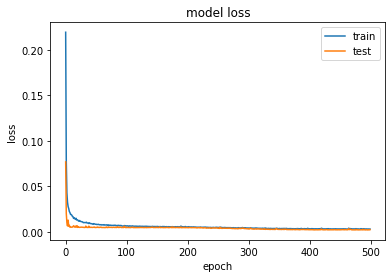

In [33]:
histories = []
histories.append(history)
history_dict = histories[0].history
plt.figure()
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predict_prices = model.predict(X_test)
predict_prices
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,predict_prices )}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,predict_prices )}")
print(f"R square: {r2_score(y_test,predict_prices )}")

5/5 [==============================] - 1s 10ms/step
#####Metrics#####
Mean Squared Error: 0.0032479659313481898
Mean Absolute Error: 0.04094217256003731
R square: 0.9056032545644638


In [35]:
'''Estructura del convertidor basado en el notebook ejemplo de Tensorflowlite [2]'''
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpcfdgx92i\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpcfdgx92i\assets


In [36]:
#Ver shape del input y output del modelo
interpreter = tf.lite.Interpreter(model_content=tfmodel)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

[{'name': 'serving_default_lstm_2_input:0', 'index': 0, 'shape': array([ 1, 60,  1]), 'shape_signature': array([-1, 60,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 45, 'shape': array([ 1, 30]), 'shape_signature': array([-1, 30]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [37]:
X_test = np.array(X_test, dtype=np.float32)
for i in range(len(X_test)):
  expected = model.predict(X_test[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  np.testing.assert_almost_equal(expected, result, decimal=5)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")
  interpreter.reset_all_variables()

1/1 [==============================] - 0s 23ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 21ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 20ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 24ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 21ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 23ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [===================

In [38]:
'''Metricas TFLite'''
result = []
for i in range(len(X_test)):
    interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
    interpreter.invoke()
    result.append(interpreter.get_tensor(output_details[0]["index"]))
    interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,result)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,result)}")
print(f"R square: {r2_score(y_test,result)}")

#####Metrics#####
Mean Squared Error: 0.003247965955692412
Mean Absolute Error: 0.04094217313790369
R square: 0.9056032537208664


In [39]:
stockValue_bncGuayaquil = stockValue_bncGuayaquil.drop_duplicates(subset = ["FECHA"])
stockValue_bncGuayaquil = stockValue_bncGuayaquil.loc[stockValue_bncGuayaquil['FECHA'] >= '2021-12-12']
stockValue_bncGuayaquil

,FECHA,EMISOR,PRECIO
356,2021-12-13,BANCO GUAYAQUIL S.A.,0.95
358,2021-12-16,BANCO GUAYAQUIL S.A.,0.88
362,2021-12-17,BANCO GUAYAQUIL S.A.,0.88
364,2021-12-20,BANCO GUAYAQUIL S.A.,0.90
369,2021-12-21,BANCO GUAYAQUIL S.A.,0.90
...,...,...,...
838,2022-12-01,BANCO GUAYAQUIL S.A.,1.01
839,2022-12-06,BANCO GUAYAQUIL S.A.,1.00
841,2022-12-07,BANCO GUAYAQUIL S.A.,1.00
845,2022-12-08,BANCO GUAYAQUIL S.A.,0.99


In [40]:
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_bncGuayaquil['PRECIO'].values.reshape(-1,1))
X_datos = []
Y_datos = []
X_datos.append(datos_norm[-60:,0])
Y_datos.append(datos_norm[-60:,0])
X_datos, Y_datos= np.array(X_datos), np.array(Y_datos)
X_datos = np.reshape(X_datos, (X_datos.shape[0], X_datos.shape[1],1))

In [41]:
# keras
prediccion = model.predict(X_datos)
predicted_prices_scaled = normalizador.inverse_transform(prediccion)
predicted_prices_scaled

1/1 [==============================] - 0s 24ms/step


array([[0.9963851 , 0.9968521 , 0.9968821 , 0.9956675 , 0.99643874,
        0.9963335 , 0.9957792 , 0.9942771 , 0.9948096 , 0.9943703 ,
        0.99392325, 0.9925558 , 0.992262  , 0.9918783 , 0.99263626,
        0.99251443, 0.9910235 , 0.99041355, 0.98948   , 0.9898001 ,
        0.98889315, 0.98834735, 0.9884081 , 0.98846555, 0.9886437 ,
        0.98732823, 0.98765284, 0.9877758 , 0.9877991 , 0.9872661 ]],
      dtype=float32)

In [42]:
# Lite
result = []
X_datos = X_datos.astype(np.float32)
interpreter.set_tensor(input_details[0]["index"], X_datos)
interpreter.invoke()
result.append(interpreter.get_tensor(output_details[0]["index"]))
interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
print(result)
predicted_prices_scaled = normalizador.inverse_transform(result)
predicted_prices_scaled

[[0.68461823 0.68736506 0.6875415  0.68039703 0.68493396 0.6843145
  0.6810545  0.6722187  0.6753509  0.6727663  0.67013645 0.66209304
  0.6603649  0.6581074  0.6625662  0.66184944 0.65307903 0.6494913
  0.64400005 0.6458826  0.6405481  0.63733715 0.63769436 0.6380327
  0.63908064 0.63134235 0.63325197 0.633975   0.6341124  0.63097715]]


array([[0.9963851 , 0.9968521 , 0.9968821 , 0.9956675 , 0.99643874,
        0.9963335 , 0.9957792 , 0.9942771 , 0.9948096 , 0.9943703 ,
        0.99392325, 0.9925558 , 0.992262  , 0.9918783 , 0.99263626,
        0.99251443, 0.9910235 , 0.99041355, 0.98948   , 0.9898001 ,
        0.98889315, 0.98834735, 0.9884081 , 0.98846555, 0.9886437 ,
        0.98732823, 0.98765284, 0.9877758 , 0.9877991 , 0.9872661 ]],
      dtype=float32)

In [43]:
keras_file = "modelBG.h5"
model.save(keras_file, save_format="tf")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()
open("modelBG.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmprxzj48nu\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmprxzj48nu\assets


160084

In [44]:
del model, datos_norm, keras_file, converter,result, X_train, X_test, y_train, y_test, X_datos, Y_datos, predict_prices, histories, history

Cerveceria Nacional

In [45]:
'''Normalizamos los Datos'''
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_cervNacional['PRECIO'].values.reshape(-1,1))
datos_norm

array([[0.82218271],
       [0.81773727],
       [0.82218271],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [1.        ],
       [1.        ],
       [0.84440987],
       [0.84440987],
       [0.86663703],
       [0.95554568],
       [0.84440987],
       [0.84440987],
       [0.84440987],
       [0.82218271],
       [0.82218271],
       [0.73327406],
       [0.78884196],
       [0.78884196],
       [0.78884196],
       [0.78884196],
       [0.84329851],
       [0.78884196],
       [0.78884196],
       [0.73327406],
       [0.73327406],
       [0.78884196],
       [0.73327406],
       [0.77772838],
       [0.77772838],
       [0.77772838],
       [0.78884196],
       [0.82218271],
       [0.77772838],
       [0.77772838],
       [0.77772838],
       [0.82151589],
       [0.777

In [46]:
X_datos, Y_datos = to_supervised(datos_norm, 60,30)

In [49]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(puntos_prediccion,1)))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=30))
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_datos, Y_datos, test_size=0.2, random_state=0)

In [53]:
history = model.fit(X_train,y_train,epochs=500,batch_size=32, validation_split=0.1)

Epoch 1/500
7/7 [==============================] - 0s 48ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 2/500
7/7 [==============================] - 0s 46ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 3/500
7/7 [==============================] - 0s 48ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 4/500
7/7 [==============================] - 0s 45ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/500
7/7 [==============================] - 0s 40ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 6/500
7/7 [==============================] - 0s 40ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 7/500
7/7 [==============================] - 0s 39ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 8/500
7/7 [==============================] - 0s 44ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 9/500
7/7 [==============================] - 0s 56ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 10/500
7/7 [==============================] - 0s 43ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 11/500
7/7 [=

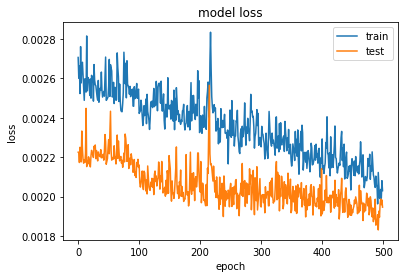

In [54]:
histories = []
histories.append(history)
history_dict = histories[0].history
plt.figure()
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predict_prices = model.predict(X_test)
predict_prices
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,predict_prices )}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,predict_prices )}")
print(f"R square: {r2_score(y_test,predict_prices )}")

2/2 [==============================] - 0s 11ms/step
#####Metrics#####
Mean Squared Error: 0.00192282578706094
Mean Absolute Error: 0.034581920275956926
R square: 0.8635488027748586


In [56]:
'''Estructura del convertidor basado en el notebook ejemplo de Tensorflowlite [2]'''
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpo3sbat3x\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpo3sbat3x\assets


In [57]:
#Ver shape del input y output del modelo
interpreter = tf.lite.Interpreter(model_content=tfmodel)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)
print(output_details)

[{'name': 'serving_default_lstm_4_input:0', 'index': 0, 'shape': array([ 1, 60,  1]), 'shape_signature': array([-1, 60,  1]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 45, 'shape': array([ 1, 30]), 'shape_signature': array([-1, 30]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [58]:
X_test = np.array(X_test, dtype=np.float32)
for i in range(len(X_test)):
  expected = model.predict(X_test[i:i+1])
  interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
  interpreter.invoke()
  result = interpreter.get_tensor(output_details[0]["index"])

  np.testing.assert_almost_equal(expected, result, decimal=5)
  print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")
  interpreter.reset_all_variables()

1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 22ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 23ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 25ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 24ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 24ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [==============================] - 0s 23ms/step
Done. The result of TensorFlow matches the result of TensorFlow Lite.
1/1 [===================

In [59]:
'''Metricas TFLite'''
result = []
for i in range(len(X_test)):
    interpreter.set_tensor(input_details[0]["index"], X_test[i:i+1, :, :])
    interpreter.invoke()
    result.append(interpreter.get_tensor(output_details[0]["index"]))
    interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
"""Metrics"""
print("#####Metrics#####")
print(f"Mean Squared Error: {mean_squared_error(y_test,result)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test,result)}")
print(f"R square: {r2_score(y_test,result)}")

#####Metrics#####
Mean Squared Error: 0.0019228257700879753
Mean Absolute Error: 0.03458192021488659
R square: 0.8635488043752769


In [60]:
stockValue_cervNacional = stockValue_cervNacional.drop_duplicates(subset = ["FECHA"])
stockValue_cervNacional = stockValue_cervNacional.loc[stockValue_cervNacional['FECHA'] >= '2021-12-12']
stockValue_cervNacional

,FECHA,EMISOR,PRECIO
125,2021-12-20,CERVECERIA NACIONAL CN S A,54.0
126,2021-12-29,CERVECERIA NACIONAL CN S A,65.0
127,2022-01-04,CERVECERIA NACIONAL CN S A,63.0
128,2022-01-05,CERVECERIA NACIONAL CN S A,60.0
129,2022-01-07,CERVECERIA NACIONAL CN S A,58.0
...,...,...,...
384,2022-11-24,CERVECERIA NACIONAL CN S A,55.0
385,2022-11-29,CERVECERIA NACIONAL CN S A,58.0
386,2022-12-02,CERVECERIA NACIONAL CN S A,55.0
390,2022-12-07,CERVECERIA NACIONAL CN S A,55.0


In [61]:
normalizador = preprocessing.MinMaxScaler()
datos_norm = normalizador.fit_transform(stockValue_cervNacional['PRECIO'].values.reshape(-1,1))
X_datos = []
Y_datos = []
X_datos.append(datos_norm[-60:,0])
Y_datos.append(datos_norm[-60:,0])
X_datos, Y_datos= np.array(X_datos), np.array(Y_datos)
X_datos = np.reshape(X_datos, (X_datos.shape[0], X_datos.shape[1],1))

In [62]:
# keras
prediccion = model.predict(X_datos)
predicted_prices_scaled = normalizador.inverse_transform(prediccion)
predicted_prices_scaled

1/1 [==============================] - 0s 23ms/step


array([[56.38672 , 56.44134 , 56.29127 , 56.127155, 56.046623, 55.821213,
        55.649506, 55.52575 , 55.15431 , 54.919716, 54.73718 , 54.466496,
        54.2641  , 54.330326, 54.048477, 53.9862  , 54.11208 , 54.04447 ,
        54.079636, 53.857037, 53.826046, 53.936066, 53.84213 , 53.592518,
        53.41851 , 53.10186 , 52.991688, 52.930084, 52.57472 , 52.534077]],
      dtype=float32)

In [63]:
# Lite
result = []
X_datos = X_datos.astype(np.float32)
interpreter.set_tensor(input_details[0]["index"], X_datos)
interpreter.invoke()
result.append(interpreter.get_tensor(output_details[0]["index"]))
interpreter.reset_all_variables()
result = np.array(result)
result = result.reshape(result.shape[0], result.shape[2])
print(result)
predicted_prices_scaled = normalizador.inverse_transform(result)
predicted_prices_scaled

[[0.52121824 0.52425456 0.5159127  0.5067901  0.5023136  0.48978394
  0.4802395  0.47335997 0.45271313 0.43967283 0.42952627 0.41447997
  0.40322942 0.40691087 0.39124382 0.38778222 0.39477915 0.39102113
  0.3929758  0.38060248 0.3788798  0.38499522 0.37977365 0.36589867
  0.3562263  0.33862478 0.33250082 0.32907632 0.3093229  0.30706376]]


array([[56.38672 , 56.44134 , 56.29127 , 56.127155, 56.046623, 55.821213,
        55.649506, 55.52575 , 55.15431 , 54.919712, 54.73718 , 54.466496,
        54.2641  , 54.330326, 54.048473, 53.9862  , 54.11208 , 54.044468,
        54.079636, 53.857037, 53.826046, 53.936066, 53.84213 , 53.592518,
        53.41851 , 53.10186 , 52.991688, 52.930084, 52.57472 , 52.534077]],
      dtype=float32)

In [64]:
keras_file = "modelCN.h5"
model.save(keras_file, save_format="tf")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter._experimental_default_to_single_batch_in_tensor_list_ops = True
tfmodel = converter.convert()
open("modelCN.tflite", "wb").write(tfmodel)

INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpbukk2ri3\assets


INFO:tensorflow:Assets written to: C:\Users\juane\AppData\Local\Temp\tmpbukk2ri3\assets


160084

In [65]:
del model, datos_norm, keras_file, converter,result, X_train, X_test, y_train, y_test, X_datos, Y_datos, predict_prices

## Citas
[1] J. Brownlee. "Multistep Time Series Forecasting with LSTMs in Python - MachineLearningMastery.com". MachineLearningMastery.com. https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/.
[2] TensorFlow. "Keras LSTM fusion Codelab". Google Colab. https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/examples/experimental_new_converter/Keras_LSTM_fusion_Codelab.ipynb#scrollTo=Cf6KC9fbFY5f.